#  HW 1

Note: Need to check 2b, 3a


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

# 1. Floating away
1a. (Z ex1.1)  In your choice of programming language, create a floating point variable and initialize it to 0.1. Now, print it out in full precision (you may need to use format specifiers in your language to get all significant digits the computer tracks). 

You should see that it is not exactly 0.1 to the computer—this is the floating point error. The number 0.1 is not exactly representable in the binary format used for floating point. What is the degree of floating point error you find? How does this floating point error change if you declare you variable as ``single precision" versus ``double precision"?

In [2]:
a=0.1 
print('{:f}'.format(a))
print('{:24.22f}'.format(a))

b = np.float32(0.1)
print('{:f}'.format(b))
print('{:24.22f}'.format(b))



0.100000
0.1000000000000000055511
0.100000
0.1000000014901161193848


Most Python systems map floating points to double precision, so even though a is techincally a float it is 
stored as a double. However, the default format prints only 6 digits.

You can force a float to be single precision by using np.float32(). The degree of precision appears to be to the 8th and 17th decimal place respectively.

See https://docs.python.org/3/tutorial/floatingpoint.html

1b. (Z ex1.2) Using the method you sketched out in class, determine the roundoff error $\epsilon$ for your machine.

In [3]:
a = 1.0
eps = 1.0
for i in range(1,60):
    eps=eps/2.0
    if i >= 50:
        print('{:24.22f}'.format(a+eps))
        print(i, eps)
    

1.0000000000000008881784
50 8.881784197001252e-16
1.0000000000000004440892
51 4.440892098500626e-16
1.0000000000000002220446
52 2.220446049250313e-16
1.0000000000000000000000
53 1.1102230246251565e-16
1.0000000000000000000000
54 5.551115123125783e-17
1.0000000000000000000000
55 2.7755575615628914e-17
1.0000000000000000000000
56 1.3877787807814457e-17
1.0000000000000000000000
57 6.938893903907228e-18
1.0000000000000000000000
58 3.469446951953614e-18
1.0000000000000000000000
59 1.734723475976807e-18


Looks like the roundoff error occurs at i=53 when epsilon = 1.1102230246251565e-16.
So you really need to be adding numbers with huge discrepancy in power together before it becomes a problem. But this can happen in hydrodynamic problems (e.g., small source terms). We call the equations "stiff".


If you compared with the results of your classmates you likely found the floating point errors to be the same, which is because of the specific number of bits that a single and double precision number is assigned by definition. The round off errors may vary slightly however. This results suggests that fundmentally calculations may not be deterministic, that is, if you run the same calculation/operation on different machines you will get a slightly different result.

# 2. Integral Processes


a. Here we will numerically calculate the following integral:

$\int_1^5 \frac{1}{x^{3/2}} dx$

The exact value of the integral is:

$-2{x^{-1/2}}|_1^5 = -2/\sqrt{5}+2$

One of the simplest methods for integration as we discussed in class uses the Rectangle Rule:

/Users/so8266/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


Trapezoidal Error 1e-3, Nsteps= 1649.0 0.000999570047871561
Trapezoidal Error 1e-5, Nsteps= 164723.0 9.999965889439023e-06


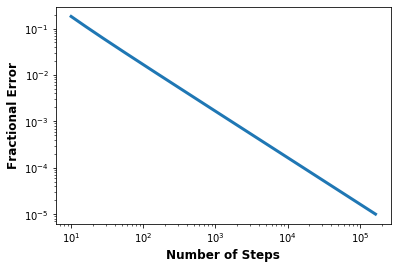

slope (should be first order = -1), offset: [-1.00024597  0.5018574 ]


In [5]:
# Rectangle Rule

# Function to be integrated
def function(x):
    return x**(-3./2.)


# Rectangle Integral
# Super-fast - we use minimal floating point ops + explolit Python efficiencies
def rect(func, lo, hi, Nstep):
    dx = (hi-lo)/Nstep
    points = func(np.linspace(a,a+(N-1)*dx,N))
    return dx*np.sum(points)

# Integral limits
a = 1.0
b = 5.0

# Define variables
frac_error = 100
min_error = 1e-5
N = 10. # Initial step number

analytic = -2/np.sqrt(5)+2

# Store errors
liststeps_rec = []
listerrors_rec = []

dx = 0.0
while frac_error > min_error:
    
    total = rect(function, a, b, N)
       
    frac_error = np.abs(total-analytic)/analytic
    liststeps_rec.append(N)  #This operation adds a nontrivial amount of time!
    listerrors_rec.append(frac_error)
    N = N+1

idx1_rec = np.argmax(np.array(listerrors_rec) < 1e-3)    #index of first instance where the fractional error < 1e-3
idx2_rec = np.argmax(np.array(listerrors_rec) < 1e-5)    #index of first instance where the fractional error < 1e-5

print("Trapezoidal Error 1e-3, Nsteps=",liststeps_rec[idx1_rec], listerrors_rec[idx1_rec])
print("Trapezoidal Error 1e-5, Nsteps=",liststeps_rec[idx2_rec], listerrors_rec[idx2_rec])
    
# Plot fractional error:
fw = 2
tsz = 12
fig, ax = plt.subplots(edgecolor='black')

ax.loglog(liststeps_rec, listerrors_rec, lw=3)
ax.set_xlabel("Number of Steps", size=tsz, fontweight='bold')
ax.set_ylabel("Fractional Error", size=tsz, fontweight='bold')

plt.show()

# Check the rate of convergence:
coeff = np.polyfit(np.log(liststeps_rec), np.log(listerrors_rec), 1)
print("slope (should be first order = -1), offset:", coeff) 

Based on the above the fractional error <1e-3 when N>1649. The fractional error <1e-5 when N>164723.

Note that using the superfast approach for integrating, we can compute the integral 164,700 times in only a few minutes.

2b. Another slightly more sophisticated approach uses the Trapezoidal Rule:

Analytic result =  1.1055728090000843
Trapezoidal Error 1e-3, Nsteps= 43 0.0009596466149766364
Trapezoidal Error 1e-5, Nsteps= 422 9.976374240630175e-06


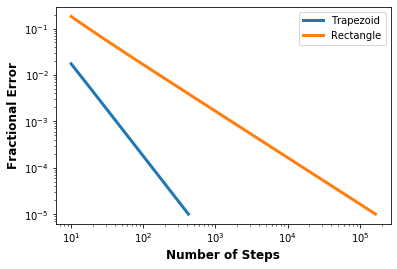

slope (should be 2nd order = -2), offset: [-1.99830336  0.56544889]


In [6]:
# Trapezoid Rule

# Define variables
frac_error = 100
min_error = 1e-5

N = 10
a = 1.0
b = 5.0

analytic = -2/np.sqrt(5)+2

# Function to be integrated
def function(x):
    return x**(-3./2.)

# Trapezoid Integral
# Super-fast - we only evaluate the points once + explolit Python efficiencies
def trap(func, lo, hi, Nstep):
    dx = (hi-lo)/(2*Nstep)
    points = func(np.linspace(lo,hi,Nstep+1))  #Super-fast - we only evaluate the points once
    return dx*np.sum(points[0:-1]+points[1:])


# Trapezoid Integral
# Much slower 'for loop' way (similar to C approach) -- although still evaluate points once
def trapslow(func, lo, hi, Nstep):
    total = 0.0
    dx = (hi-lo)/(2*Nstep)
    steps = np.linspace(lo,hi,Nstep+1) 
    lo = function(a)
    for i,step in enumerate(steps[:-1]):
        hi = function(steps[i+1])
        total += (lo+hi)*dx
        lo = hi
    return total

liststeps_trap = []
listerrors_trap = []

while frac_error > min_error:

    # Fast optimal python way
    total = trap(function, a, b, N)
    
    # Slow way:
    #total = trapslow(function, a, b, N) 
        
    frac_error = np.abs(total-analytic)/analytic
    liststeps_trap.append(N)  #This operation adds a nontrivial amount of time!
    listerrors_trap.append(frac_error)
    N = N+1

print("Analytic result = ", analytic)

idx1_trap = np.argmax(np.array(listerrors_trap) < 1e-3)    #index of first instance where the fractional error < 1e-3
idx2_trap = np.argmax(np.array(listerrors_trap) < 1e-5)    #index of first instance where the fractional error < 1e-5

print("Trapezoidal Error 1e-3, Nsteps=",liststeps_trap[idx1_trap], listerrors_trap[idx1_trap])
print("Trapezoidal Error 1e-5, Nsteps=",liststeps_trap[idx2_trap], listerrors_trap[idx2_trap])


# Plot fractional error:
fw = 2
tsz = 12
fig, ax = plt.subplots(edgecolor='black')

ax.loglog(liststeps_trap, listerrors_trap, lw=3, label='Trapezoid')
ax.loglog(liststeps_rec, listerrors_rec, lw=3, label='Rectangle')
ax.legend()

ax.set_xlabel("Number of Steps", size=tsz, fontweight='bold')
ax.set_ylabel("Fractional Error", size=tsz, fontweight='bold')

plt.show()

# Check the rate of convergence:
coeff = np.polyfit(np.log(liststeps_trap), np.log(listerrors_trap), 1)
print("slope (should be 2nd order = -2), offset:", coeff) 


The trapezoidal rule requires only 43 steps to get down to 1e-3 accuracy and 422 to get down to 1e-5.

Looking at the slope of the convergence gives the order of accuracy, which is indeed -2.

We see there is a huge advantage to using a more accurate method, even if that approach uses slightly more floating point operations. Here, the Trapezoid approach has one more floating point operation, which should make it 30% slower. However, because its accuracy is higher, it completes the calculation in orders of magnitude fewer steps, which translates into a signficant time savings when a high accuracy result is required.

2b. Compare the results of your two integration routines from (c) to a built-in function in your programming language . 

In [7]:
from scipy.integrate import quad #Uses Gaussian quadrature based on Fortran library technqiue

a = 1.0
b = 5.0
analytic = 2.0/5.0*(b**(5./2.0) - a**(5.0/2.0))
def integrand(x):
    return x**(3.0/2.0)

total, uncertainty = quad(integrand, a, b)
print("Analytic result = ", analytic)
print("Fractional Error = ", np.abs(total-analytic)/analytic, uncertainty)


Analytic result =  21.9606797749979
Fractional Error =  1.6177612511090134e-16 2.438125232262267e-13


The default method of intergration 'quad' is pretty accurate and fast. The scipy quad function uses QUADPACK, which is a FORTRAN77 library that estimates integrals using numerical quadrature. In this approach, some degree of allowed error ('tolerance') is an input rather than an a priori stepsize, N. The function recursively divides the integral range until the specified minimum error is acheived. It is also fast because Fortran is generally much faster than Python (or C).

To be pedantic, the python quad method calls the 'qags' FORTRAN77 routine for a finite integral, which uses adaptive 21-point Gauss–Kronrod quadrature within each subinterval (see https://en.wikipedia.org/wiki/Gauss–Kronrod_quadrature_formula, https://en.wikipedia.org/wiki/QUADPACK). Adaptive quadrature makes an approximation of the integral from a to b and estimates the error. If this error is larger than some tolerance (which you can set), the integral is divided into two integrals (from a to some value m, and m to b) where both halves are integrated seperately. Either the initial estimate or the sum of the recursively computed halves is returned. I note the fractional error I estimate for the result is actually better than that reported by the function itself (it uses a numerical rather than analytic estimate). In order for our methods to obtain the above accuracy a lot of steps are needed! 

Other integration options are trapezoid ('trapz'), which you can show is 2nd order, and  Simpson's rule ('simps')m which is 4th order.

Specifically, the fractional error for the rectangle rule is linear in a log-log plot. Therefore, if ~ a few 1e2 steps are needed to get 1e-5 then to obtain uncertainties of better than 1e-13, then 1e13 steps are needed.

The fractional error for the trapexoidal rule is quadratic in a log-log plot. Therefore, if ~1e5 steps are needed to get 1e-5 then to obtain uncertainties of better than 1e-13, then a few 1e6 steps are needed.

Looking through scipy documentation for integration finds a variety of other approaches you might use (including the Python version of the trapazoidal rule, trapz).

# 3. Shooting for the stars.

3a. Write a standalone program to compute the orbit of the Earth around the Sun using one of the integration methods you implemented above (follow Z ex 1.8). This program can be used to compute the orbits of different solar system bodies or modified to be applied to other stellar systems.

Note Z1.8 specifies using first order Euler, but this is just what we call the rectangle rule.
However, we can't use our rectangle function directly because we have a coupled
system of ODEs:

$\dot x = v$

$\dot v = - \frac{GM r}{r^3}$

Consequently, first, we have to update the x,y velocity then x,y position.

<Figure size 432x288 with 0 Axes>

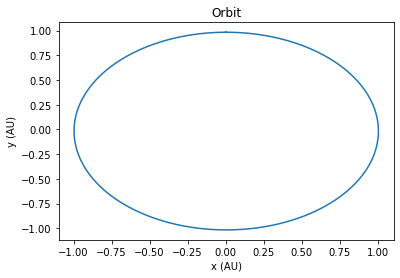

<Figure size 432x288 with 0 Axes>

In [8]:
# Integrate Earth Orbit

# Use AU, yrs, msun units
GM = 4 * np.pi**2

# System parameters
a = 1.0   # semi-major axis
e = 0.01671 # eccentricity

# Initial position, velocities
x0 = 0
y0 = a*(1-e)
vx0 = - np.sqrt(GM/a*(1+e)/(1-e))
vy0 = 0

# Resolution parameters
orbits = 1.0 # Number of orbits to evolve (in years)
N = 1000     # Step number per orbit
dt = orbits/N # Timestep (in years)

x = [x0]
y = [y0]
vx = [vx0]
vy = [vy0]

# Calculate acceleration
def acc(x,y):
    const = -GM/(x**2+y**2)**(3.0/2.0)
    return x*const, y*const

for i in range(N):
    # Get accelerations
    dvx, dvy  = acc(x[i], y[i])

    # Update velocities
    vx.append(vx[i]+dvx*dt)
    vy.append(vy[i]+dvy*dt)
    
    # Update positions
    x.append(x[i]+vx[i+1]*dt)
    y.append(y[i]+vy[i+1]*dt)
    

plt.figure()
plt.title('Orbit')
plt.plot(x,y)
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.figure()    


3b. Write a standalone program that computes the integral for the co-moving distance.

$D_c = \int_0^z dz' [\Omega_m (1+z')^3 + (1. - \Omega_m - \Omega_\Lambda)(1+z')^2 + \Omega_\Lambda]^{-1/2}$

In [9]:
# Here we'll just use our rectangle rule

# Define variables
N = 1000.0
z0 = 0.0 # redshift z = 0
zf = 2.0 # z = 2
h = 0.7 # Hubble constant

# Here we define our function for D_c
def function(x):
    omm = 0.3 # Omega Matter
    oml = 0.7 # Omega Lambda
    return 1.0/(omm*(1+x)**3 + (1 - omm - oml)*(1+x)**2 + oml)**0.5

total = trap(function, z0, zf, N)

print("Integral =", total)
print("Comoving distance to z = 2 is: ", total*3000/h, "Mpc")


Integral = 1.2094713025569486
Comoving distance to z = 2 is:  5183.4484395297795 Mpc


/Users/so8266/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


So what exactly is the comoving distance? A small comoving distance $\delta D_c$ between two nearby objects in the Universe is the distance between them that remains constant with epoch if the two objects are moving with the Hubble flow. In other words, it is the distance between them that would be measured with rulers at the time they are being observed (the proper distance) divided by the ratio of the scale factor of the Universe then to now. So, it is the proper distance multiplied by $(1 + z)$. The total line-of-sight comoving distance $D_c$ from us to a distant object is computed by integrating the infinitesimal $\delta D_c$ contributions between nearby events along the radial ray from $z = 0$ to the object.

/Users/so8266/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


<Figure size 432x288 with 0 Axes>

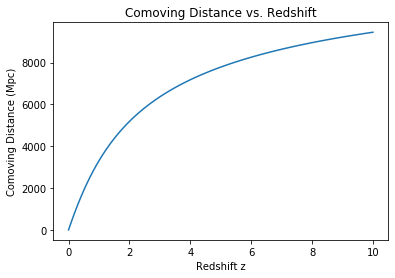

<Figure size 432x288 with 0 Axes>

In [10]:
# Make a plot as a function of z:

omegam = 0.3
omegalam = 0.7
Nsteps = 1000
h=0.7

z0 = 0.0
redshifts = np.linspace(z0, 10, 100)
comoving = []

# Here we define our function for D_c
def function(x):
    omm = 0.3 # Omega Matter
    oml = 0.7 # Omega Lambda
    return 1.0/(omm*(1+x)**3 + (1 - omm - oml)*(1+x)**2 + oml)**0.5

for zmax in redshifts:
    comoving.append(trap(function, z0, zmax, N))
    

plt.figure()
plt.title('Comoving Distance vs. Redshift')
plt.plot(redshifts, np.array(comoving)*3000/h)
plt.xlabel('Redshift z')
plt.ylabel('Comoving Distance (Mpc)')
plt.figure()